In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings(action='ignore')
# import nltk
#nltk.download('all') # 처음 실행 시 주석을 제거하고 실행해주세요!

In [2]:
from tqdm import tqdm


In [3]:
df = pd.read_excel('news_label.xlsx', engine='openpyxl')

In [4]:
df

,dates,titles,contents,label,근거
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//,[\n마스카라까지 지우는 세정비누\n\n\n\n 피부에 자극을 주지 않고 각종 화장...,0,관련없음
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",[\n기사내용 요약매장은 늘고 점포당 매출은 매월 줄고 있어코로나19로 마트 대신 ...,1,편의점과 제휴
2,2021.10.08,[株머니 매니저의 HOT종목]//,[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 주력 ...,1,성장언급
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//",[\n별도 물류센터 없이 동네마트 활용…中 알리바바의 슈퍼마켓 '허만셴셩' 벤치마크...,0,관련없음
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",[\n\n\n\n\n/사진=알리익스프레스중국 최대 규모의 해외직구 쇼핑몰에서도 네이...,1,네이버 파이낸셜(네이버페이)와 제휴
...,...,...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//",[\n심사 승인 났는데 IPO 감감무소식골프존카운티는 내년으로 연기컬리도 오아시스 ...,-,NaN
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",[\n\t\t\t서울먹거리창업센터는 서울시가 국내 최초로 설립한 농식품 분야 특화 ...,-,NaN
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//",[\n■국감 오르는 유통업 새 먹거리e커머스 맞서 경쟁력 강화 위해쿠팡이츠마트 등 ...,-,NaN
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//,"[\n이커머스 IPO 대전, 흑자 기업 오아시스 연내 목표컬리, 증시 부진에 예상 ...",-,NaN


<AxesSubplot:>

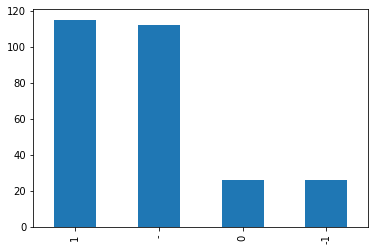

In [5]:
df['label'].value_counts().plot(kind='bar')

In [6]:
df = df.rename(columns={'dates':'date', 'titles':'title','contents':'content'})
df['content'] = df['title'] + df['content']

In [7]:
df = df.drop(columns=['근거', 'title'])

In [8]:
train = df[:167]
# train['label'] = train['label'].astype(int)
train

,date,content,label
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,0
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",1
2,2021.10.08,[株머니 매니저의 HOT종목]//[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성...,1
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//[\...",0
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",1
...,...,...,...
162,2022.04.22,"[NH투자증권, SK에코플랜트 주관사 선정… IPO 실적 호조]//[우리생협, 오아...",-1
163,2022.04.25,[“500억 투자했는데”... 홍정국의 아픈 손가락 ‘헬로네이처’ 매각 적신호]//...,1
164,2022.04.26,"[오아시스마켓 ""오프라인 매장 간판서 '생협' 제외""]//[[고고IPO] ‘업계 4...",1
165,2022.04.27,[[마켓인]프롭테크하면 무조건 뜬다?…투자유치 '부익부 빈익빈']//[IPO 앞둔 ...,-1


In [9]:
# test set
test = df[167:]
test

,date,content,label
167,2022.04.29,"[공정위, 새벽배송업체 오아시스 ‘생협 간판’ 사용에 제동]//[""무조건 창업 한번...",-
168,2022.04.30,[코로나 엔데믹 전환에 배송전쟁 판도 변화…점유율 경쟁 보다 ‘수익성’]//[\n롯...,-
169,2022.05.02,[창업자 188명 '지상 IR' 날개…K-스타트업 등용문 '우뚝']//[오아시스마켓...,-
170,2022.05.03,"[[엔데믹, 오다]이커머스 '옥석 가리기' 본격 시동]//[우여곡절 끝에 IPO 첫...",-
171,2022.05.04,[9조 원 규모 새벽배송 누가 살아남을까? 돈의 전쟁이 시작됐다!]//[\n\t\t...,-
...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//[\n심사 승인 났는...",-
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",-
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//[\n■국감 오르...",-
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//[\n이커머스 ...,-


### 학습/검증셋 분리

In [10]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train)
train.reset_index(inplace=True) # 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화해주었습니다.
val.reset_index(inplace=True)

In [11]:
### train.set_index('date')

train = train.drop(columns = ['index'])
train

,date,content,label
0,2021.12.22,"[NHN페이코, 연말 맞이 ‘페이코 포인트 플러스’ 적립 이벤트]//[\n ...",0
1,2022.01.16,"[지어소프트, 라방 솔루션 B2B 판매…소상공인 사업 효율 제고]//[새벽배송 3사...",1
2,2021.11.04,"[[시그널] 마켓컬리, 기업가치 3.5조 겨냥 또 프리IPO]//[[초점] SSG·...",1
3,2022.01.20,[50만원짜리 호텔 꽃다발도 쓱…새벽배송 이어 선물하기도 떴다]//[LG엔솔 '청약...,-1
4,2021.11.24,"[올 기업공개 사상최대...10월까지 14조]//[""지금까지의 대어는 잊어라""..`...",1
...,...,...,...
120,2021.12.21,[내년 IPO시장 `후끈`…초대어급 줄상장 `예고` [이슈플러스]]//[[민지리뷰]...,1
121,2022.01.02,[2022년 ‘IPO 대어’ 몰려온다…LG에너지솔루션·현대엔지니어링·쓱닷컴 상장 ...,1
122,2022.01.22,"[""온라인으로 빵지순례 한다""…랜선 빵킷리스트 인기]//[옷·식품만 팔던 앱들은 왜...",1
123,2022.01.09,[증시 불안에···MMF 1주새 20조 뭉칫돈]//[\n美 긴축···오스템···동시...,1


In [12]:
val

,index,date,content,label
0,117,2022.02.24,"['공차' 투자금 6배 수익낸 유니슨 비결, 하버드도 배우네]//[""살얼음판 증시·...",0
1,32,2021.11.19,"[상품 기획부터 홍보까지, 중기유통센터 손 잡은 소상공인 온라인서 '훨훨']//[새...",1
2,0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,0
3,124,2022.03.05,"[순천시, 최대 1만6천명 대대적인 일자리 창출 총력]//[\n미래산업·환경 등 4...",0
4,35,2021.11.22,"[‘MZ 공략’ 가상 커머스몰 성장세 거래액 5조 넘어]//[미래에셋證, 임인년에도...",0
5,70,2021.12.30,"[""대박 미리 잡자"" 비상장주식 올라탄 MZ세대…야놀자 243% 급등]//[""코로나...",1
6,81,2022.01.11,"['역대급 대어' LG에너지솔루션이 온다… 올해 IPO에 쏠린 눈]//[마켓컬리, ...",-1
7,160,2022.04.20,"[승자 없는 새벽배송 전쟁, 그 결말은?]//[\n투자비↑·매출↓ 롯데온·헬로네이처...",-1
8,38,2021.11.25,[[시그널] ‘IPO 시간 앞당기나' 오아시스···3~4월 예심 청구 기대]//[\...,1
9,103,2022.02.04,[투자자 돈 쓸어 담은 비상장주는? 토스·야놀자·루닛…‘드림개미’ 사로잡다]//[저...,-1


### 데이터 정제하기

In [13]:
# 문자 외의 것들 제거
train['content'] = train['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
train['content'] = train['content'].str.replace(' +',' ') 
train

,date,content,label
0,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0
1,2022.01.16,지어소프트 라방 솔루션 B2B 판매 소상공인 사업 효율 제고 새벽배송 3사는 상장...,1
2,2021.11.04,시그널 마켓컬리 기업가치 3 5조 겨냥 또 프리IPO 초점 SSG 컬리 오아시스 ...,1
3,2022.01.20,50만원짜리 호텔 꽃다발도 쓱 새벽배송 이어 선물하기도 떴다 LG엔솔 청약 전쟁 ...,-1
4,2021.11.24,올 기업공개 사상최대 10월까지 14조 지금까지의 대어는 잊어라 10조 LG엔솔 ...,1
...,...,...,...
120,2021.12.21,내년 IPO시장 후끈 초대어급 줄상장 예고 이슈플러스 민지리뷰 띵동 건강한 유기농...,1
121,2022.01.02,2022년 IPO 대어 몰려온다 LG에너지솔루션 현대엔지니어링 쓱닷컴 상장 예고 ...,1
122,2022.01.22,온라인으로 빵지순례 한다 랜선 빵킷리스트 인기 옷 식품만 팔던 앱들은 왜 가전제품...,1
123,2022.01.09,증시 불안에 MMF 1주새 20조 뭉칫돈 긴축 오스템 동시다발 악재마땅한 투자처 ...,1


<AxesSubplot:>

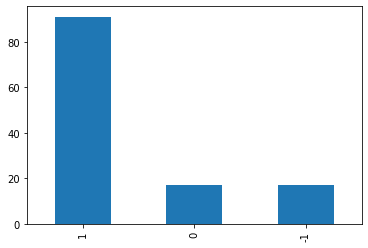

In [14]:
train['label'].value_counts().plot(kind='bar')

### 토큰화

In [15]:
from konlpy.tag import Okt

In [16]:
okt = Okt()

In [17]:
tokenized = [] # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in train['content']: # 전처리된 리뷰들을 하나씩 꺼내옵니다
    tokens = okt.morphs(sentence, stem = True) # 형태소 분석 (stem = True로 설정해 어간 추출을 해주었습니다)
    tokenize = " ".join(tokens) # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    tokenized.append(tokenize) # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가해줍니다
train["tokenized_stem"] = pd.DataFrame(tokenized) # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem
0,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...
1,2022.01.16,지어소프트 라방 솔루션 B2B 판매 소상공인 사업 효율 제고 새벽배송 3사는 상장...,1,지다 소프트 라 방 솔루션 B 2 B 판매 소상 공인 사업 효율 제 고 새벽 배송 ...
2,2021.11.04,시그널 마켓컬리 기업가치 3 5조 겨냥 또 프리IPO 초점 SSG 컬리 오아시스 ...,1,시그널 마켓 컬리 기업 가치 3 5조 겨냥 또 프리 IPO 초점 SSG 컬리 오아시...
3,2022.01.20,50만원짜리 호텔 꽃다발도 쓱 새벽배송 이어 선물하기도 떴다 LG엔솔 청약 전쟁 ...,-1,50만원 짜리 호텔 꽃다발 도 쓱 새벽 배송 이다 선물 하다 뜨다 LG 엔솔 청약 ...
4,2021.11.24,올 기업공개 사상최대 10월까지 14조 지금까지의 대어는 잊어라 10조 LG엔솔 ...,1,오다 기업 공개 사상 최대 10월 까지 14조 지금 까지의 대 어는 잊다 10조 L...


In [18]:
train['label'] = train['label'].astype(int)
train

,date,content,label,tokenized_stem
0,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...
1,2022.01.16,지어소프트 라방 솔루션 B2B 판매 소상공인 사업 효율 제고 새벽배송 3사는 상장...,1,지다 소프트 라 방 솔루션 B 2 B 판매 소상 공인 사업 효율 제 고 새벽 배송 ...
2,2021.11.04,시그널 마켓컬리 기업가치 3 5조 겨냥 또 프리IPO 초점 SSG 컬리 오아시스 ...,1,시그널 마켓 컬리 기업 가치 3 5조 겨냥 또 프리 IPO 초점 SSG 컬리 오아시...
3,2022.01.20,50만원짜리 호텔 꽃다발도 쓱 새벽배송 이어 선물하기도 떴다 LG엔솔 청약 전쟁 ...,-1,50만원 짜리 호텔 꽃다발 도 쓱 새벽 배송 이다 선물 하다 뜨다 LG 엔솔 청약 ...
4,2021.11.24,올 기업공개 사상최대 10월까지 14조 지금까지의 대어는 잊어라 10조 LG엔솔 ...,1,오다 기업 공개 사상 최대 10월 까지 14조 지금 까지의 대 어는 잊다 10조 L...
...,...,...,...,...
120,2021.12.21,내년 IPO시장 후끈 초대어급 줄상장 예고 이슈플러스 민지리뷰 띵동 건강한 유기농...,1,내년 IPO 시장 후끈 초대 어 급 줄 상장 예고 이슈 플러스 민지 리뷰 띵동 건강...
121,2022.01.02,2022년 IPO 대어 몰려온다 LG에너지솔루션 현대엔지니어링 쓱닷컴 상장 예고 ...,1,2022년 IPO 대다 몰려오다 LG 에너지 솔루션 현대 엔지니어링 쓱 닷컴 상장 ...
122,2022.01.22,온라인으로 빵지순례 한다 랜선 빵킷리스트 인기 옷 식품만 팔던 앱들은 왜 가전제품...,1,온라인 으로 빵 지 순례 하다 랜선 빵킷 리스트 인기 옷 식품 만 파다 앱 들 은 ...
123,2022.01.09,증시 불안에 MMF 1주새 20조 뭉칫돈 긴축 오스템 동시다발 악재마땅한 투자처 ...,1,증시 불안 에 MMF 1 주 새 20조 뭉칫돈 긴축 오 스템 동시 다발 악재 마땅하...


### 품사 태깅 / 불용어 처리와 비슷한 느낌

In [19]:
main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
for sentence in train['content']: # 리뷰들을 하나씩 가져옵니다
    pos = okt.pos(sentence) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
    main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
train["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem,main_pos
0,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...,페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 페이 코 연말 맞아 페이크 ...
1,2022.01.16,지어소프트 라방 솔루션 B2B 판매 소상공인 사업 효율 제고 새벽배송 3사는 상장...,1,지다 소프트 라 방 솔루션 B 2 B 판매 소상 공인 사업 효율 제 고 새벽 배송 ...,지어 소프트 방 솔루션 판매 소상 공인 사업 효율 제 새벽 배송 사는 상장 경쟁 자...
2,2021.11.04,시그널 마켓컬리 기업가치 3 5조 겨냥 또 프리IPO 초점 SSG 컬리 오아시스 ...,1,시그널 마켓 컬리 기업 가치 3 5조 겨냥 또 프리 IPO 초점 SSG 컬리 오아시...,시그널 마켓 컬리 기업 가치 겨냥 또 프리 초점 컬리 오아시스 새벽 배송 바람 타고...
3,2022.01.20,50만원짜리 호텔 꽃다발도 쓱 새벽배송 이어 선물하기도 떴다 LG엔솔 청약 전쟁 ...,-1,50만원 짜리 호텔 꽃다발 도 쓱 새벽 배송 이다 선물 하다 뜨다 LG 엔솔 청약 ...,호텔 꽃다발 쓱 새벽 배송 이어 선물 하기도 떴다 엔솔 청약 전쟁 대규모 환불 불가...
4,2021.11.24,올 기업공개 사상최대 10월까지 14조 지금까지의 대어는 잊어라 10조 LG엔솔 ...,1,오다 기업 공개 사상 최대 10월 까지 14조 지금 까지의 대 어는 잊다 10조 L...,올 기업 공개 사상 최대 지금 잊어라 엔솔 출격 내년 큰 장 선다 시장 역대 활황 ...


In [20]:
train

,date,content,label,tokenized_stem,main_pos
0,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...,페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 페이 코 연말 맞아 페이크 ...
1,2022.01.16,지어소프트 라방 솔루션 B2B 판매 소상공인 사업 효율 제고 새벽배송 3사는 상장...,1,지다 소프트 라 방 솔루션 B 2 B 판매 소상 공인 사업 효율 제 고 새벽 배송 ...,지어 소프트 방 솔루션 판매 소상 공인 사업 효율 제 새벽 배송 사는 상장 경쟁 자...
2,2021.11.04,시그널 마켓컬리 기업가치 3 5조 겨냥 또 프리IPO 초점 SSG 컬리 오아시스 ...,1,시그널 마켓 컬리 기업 가치 3 5조 겨냥 또 프리 IPO 초점 SSG 컬리 오아시...,시그널 마켓 컬리 기업 가치 겨냥 또 프리 초점 컬리 오아시스 새벽 배송 바람 타고...
3,2022.01.20,50만원짜리 호텔 꽃다발도 쓱 새벽배송 이어 선물하기도 떴다 LG엔솔 청약 전쟁 ...,-1,50만원 짜리 호텔 꽃다발 도 쓱 새벽 배송 이다 선물 하다 뜨다 LG 엔솔 청약 ...,호텔 꽃다발 쓱 새벽 배송 이어 선물 하기도 떴다 엔솔 청약 전쟁 대규모 환불 불가...
4,2021.11.24,올 기업공개 사상최대 10월까지 14조 지금까지의 대어는 잊어라 10조 LG엔솔 ...,1,오다 기업 공개 사상 최대 10월 까지 14조 지금 까지의 대 어는 잊다 10조 L...,올 기업 공개 사상 최대 지금 잊어라 엔솔 출격 내년 큰 장 선다 시장 역대 활황 ...
...,...,...,...,...,...
120,2021.12.21,내년 IPO시장 후끈 초대어급 줄상장 예고 이슈플러스 민지리뷰 띵동 건강한 유기농...,1,내년 IPO 시장 후끈 초대 어 급 줄 상장 예고 이슈 플러스 민지 리뷰 띵동 건강...,내년 시장 후끈 초대 급 줄 상장 예고 이슈 플러스 민지 리뷰 띵동 건강한 유기농 ...
121,2022.01.02,2022년 IPO 대어 몰려온다 LG에너지솔루션 현대엔지니어링 쓱닷컴 상장 예고 ...,1,2022년 IPO 대다 몰려오다 LG 에너지 솔루션 현대 엔지니어링 쓱 닷컴 상장 ...,대어 몰려온다 에너지 솔루션 현대 엔지니어링 쓱 상장 예고 올해 시장 뜨거울 듯 엔...
122,2022.01.22,온라인으로 빵지순례 한다 랜선 빵킷리스트 인기 옷 식품만 팔던 앱들은 왜 가전제품...,1,온라인 으로 빵 지 순례 하다 랜선 빵킷 리스트 인기 옷 식품 만 파다 앱 들 은 ...,온라인 빵 순례 한다 랜선 빵킷 리스트 인기 옷 식품 팔던 앱 왜 가전제품 활동 반...
123,2022.01.09,증시 불안에 MMF 1주새 20조 뭉칫돈 긴축 오스템 동시다발 악재마땅한 투자처 ...,1,증시 불안 에 MMF 1 주 새 20조 뭉칫돈 긴축 오 스템 동시 다발 악재 마땅하...,증시 불안 새 뭉칫돈 긴축 스템 동시 다발 악재 마땅한 투자 처 없어 단기 상품 몰...


### 벡터화

In [21]:
X_train = train.main_pos # training 데이터에서 문서 추출
y_train = train.label # training 데이터에서 라벨 추출

In [22]:
X_train

0      페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 페이 코 연말 맞아 페이크 ...
1      지어 소프트 방 솔루션 판매 소상 공인 사업 효율 제 새벽 배송 사는 상장 경쟁 자...
2      시그널 마켓 컬리 기업 가치 겨냥 또 프리 초점 컬리 오아시스 새벽 배송 바람 타고...
3      호텔 꽃다발 쓱 새벽 배송 이어 선물 하기도 떴다 엔솔 청약 전쟁 대규모 환불 불가...
4      올 기업 공개 사상 최대 지금 잊어라 엔솔 출격 내년 큰 장 선다 시장 역대 활황 ...
                             ...                        
120    내년 시장 후끈 초대 급 줄 상장 예고 이슈 플러스 민지 리뷰 띵동 건강한 유기농 ...
121    대어 몰려온다 에너지 솔루션 현대 엔지니어링 쓱 상장 예고 올해 시장 뜨거울 듯 엔...
122    온라인 빵 순례 한다 랜선 빵킷 리스트 인기 옷 식품 팔던 앱 왜 가전제품 활동 반...
123    증시 불안 새 뭉칫돈 긴축 스템 동시 다발 악재 마땅한 투자 처 없어 단기 상품 몰...
124    김민수 더 맘마 대표 마트 상생 이 경쟁력 총알 배송 목표 별도 물류 센터 없이 동...
Name: main_pos, Length: 125, dtype: object

In [23]:
y_train

0      0
1      1
2      1
3     -1
4      1
      ..
120    1
121    1
122    1
123    1
124    0
Name: label, Length: 125, dtype: int64

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # countvectorizer 생성
vectorizer.fit(X_train) # countvectorizer 학습
X_train_vec = vectorizer.transform(X_train) # transform

In [25]:
a = vectorizer.vocabulary_

In [26]:
type(a)

dict

In [27]:
a

{'페이': 12989,
 '연말': 8735,
 '맞이': 4364,
 '포인트': 13099,
 '플러스': 13246,
 '적립': 10643,
 '이벤트': 9757,
 '맞아': 4357,
 '페이크': 12994,
 '이용자': 9854,
 '다양한': 2729,
 '프로모션': 13221,
 '진행': 11588,
 '한다고': 13505,
 '밝혔다': 5272,
 '지난': 11428,
 '테크': 12665,
 '돌이': 3243,
 '재테크': 10583,
 '선호': 6846,
 '하는': 13377,
 '세대': 6969,
 '출시': 12092,
 '했다': 13770,
 '동해': 3316,
 '사용': 6385,
 '서비스': 6747,
 '가맹': 89,
 '여부': 8651,
 '상관없이': 6541,
 '국내외': 1141,
 '오프라인': 8963,
 '매장': 4435,
 '체크카드': 11939,
 '있다': 10234,
 '통해': 12719,
 '신청': 7678,
 '하면': 13415,
 '모바일': 4650,
 '카드': 12246,
 '실물': 7712,
 '발급': 5234,
 '가능하며': 35,
 '실적': 7725,
 '조건': 11008,
 '없이': 8555,
 '결제': 677,
 '마다': 4094,
 '혜택': 13918,
 '받을': 5227,
 '모든': 4640,
 '시중': 7543,
 '은행': 9561,
 '증권사': 11397,
 '계좌': 755,
 '가능하다': 31,
 '받는': 5197,
 '제공': 10943,
 '즉시': 11374,
 '지급': 11416,
 '하며': 13414,
 '선정': 6835,
 '브랜드': 6059,
 '있는': 10226,
 '만원': 4235,
 '상당': 6547,
 '쿠폰': 12440,
 '함께': 13576,
 '증정': 11405,
 '한다': 13504,
 '더해': 3078,
 '구매': 1092,
 '최대': 12012,
 

In [28]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
y_train = y_train.astype('int')

### 모델 학습

In [30]:
from sklearn.linear_model import LogisticRegression # 모델 불러오기

model = LogisticRegression() # 객체에 모델 할당

model.fit(X_train_vec, y_train) # 모델 학습

LogisticRegression()

In [31]:
# val = val.drop(columns=['index'])
val

,index,date,content,label
0,117,2022.02.24,"['공차' 투자금 6배 수익낸 유니슨 비결, 하버드도 배우네]//[""살얼음판 증시·...",0
1,32,2021.11.19,"[상품 기획부터 홍보까지, 중기유통센터 손 잡은 소상공인 온라인서 '훨훨']//[새...",1
2,0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,0
3,124,2022.03.05,"[순천시, 최대 1만6천명 대대적인 일자리 창출 총력]//[\n미래산업·환경 등 4...",0
4,35,2021.11.22,"[‘MZ 공략’ 가상 커머스몰 성장세 거래액 5조 넘어]//[미래에셋證, 임인년에도...",0
5,70,2021.12.30,"[""대박 미리 잡자"" 비상장주식 올라탄 MZ세대…야놀자 243% 급등]//[""코로나...",1
6,81,2022.01.11,"['역대급 대어' LG에너지솔루션이 온다… 올해 IPO에 쏠린 눈]//[마켓컬리, ...",-1
7,160,2022.04.20,"[승자 없는 새벽배송 전쟁, 그 결말은?]//[\n투자비↑·매출↓ 롯데온·헬로네이처...",-1
8,38,2021.11.25,[[시그널] ‘IPO 시간 앞당기나' 오아시스···3~4월 예심 청구 기대]//[\...,1
9,103,2022.02.04,[투자자 돈 쓸어 담은 비상장주는? 토스·야놀자·루닛…‘드림개미’ 사로잡다]//[저...,-1


### 검증셋으로 모델 성능 검증

In [32]:
# preprocessed
# 문자 외의 것들 제거
val['content'] = val['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
val['content'] = val['content'].str.replace(' +',' ') 

# tokenized_stem
tokenized = []
for sentence in val['content']:
    tokens = okt.morphs(sentence, stem = True) # stem = True로 설정해 어간 추출을 해주었습니다
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
val["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in val['content']:
    pos = okt.pos(sentence)
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")]
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
val["main_pos"] = pd.DataFrame(main_pos)

val.head()

,index,date,content,label,tokenized_stem,main_pos
0,117,2022.02.24,공차 투자금 6배 수익낸 유니슨 비결 하버드도 배우네 살얼음판 증시 깐깐한 문턱 ...,0,공차 투 자금 6 배 수익 내다 유니슨 비결 하버드 도 배우다 살얼음 판 증시 깐깐...,공차 투 자금 배 수익 낸 유니슨 비결 하버드 배우네 살얼음 판 증시 깐깐한 문턱 ...
1,32,2021.11.19,상품 기획부터 홍보까지 중기유통센터 손 잡은 소상공인 온라인서 훨훨 새벽배송 인구...,1,상품 기획 부터 홍보 까지 중 기 유통 센터 손 잡다 소상 공인 온라인 서 훨훨 새...,상품 기획 홍보 중 유통 센터 손 잡은 소상 공인 온라인 훨훨 새벽 배송 인구 세대...
2,0,2021.10.05,톡톡 이상품 한빛코리아 다지워 네이처 클렌징 솝 마스카라까지 지우는 세정비누 피부...,0,톡톡 이 상품 한빛 코리아 다지다 네이처 클렌징 솝 마스카라 까지 지우다 세 정 비...,톡톡 상품 한빛 코리아 다지워 네이처 클렌징 솝 마스카라 지우는 정 비누 피부 자극...
3,124,2022.03.05,순천시 최대 1만6천명 대대적인 일자리 창출 총력 미래산업 환경 등 4대 분야 취...,0,순천시 최대 1만 6천 명 대 대적 인 일자리 창 추다 총력 미래 산업 환경 등 4...,순천시 최대 대적 일자리 창 출 총력 미래 산업 환경 등 대 분야 취업 증가 등 고...
4,35,2021.11.22,MZ 공략 가상 커머스몰 성장세 거래액 5조 넘어 미래에셋 임인년에도 IPO 1등...,0,MZ 공략 가상 커머스 몰다 성장 세 거래 액 5조 넘다 미래에셋 임인년 에도 IP...,공략 가상 커머스 몰 성장 세 거래 액 넘어 미래에셋 임인년 맛집 예약 조간 브리핑...


학습한 모델로 예측할 X를 벡터화

In [33]:
X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.label #validation 데이터에서 라벨 추출

X_val_vec = vectorizer.transform(X_val) # train셋으로 fit한 벡터라이저 이용해 transform

In [34]:
# run model
y_pred = model.predict(X_val_vec)
print(y_pred)
#0:negative 1:positive

[ 1  1  0  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1]


정확도 확인

In [35]:
y_val = y_val.astype('int')

In [36]:
from sklearn import metrics
print('accuracy =', metrics.accuracy_score(y_val, y_pred)) # 정확도 확인

accuracy = 0.6428571428571429
